<h2 style = "color:seagreen" align = "center" > K-Means Clustering: Customer Segmentation </h2>

## Introduction

There are many models for **clustering** out there. In this notebook, we will be presenting the model that is considered one of the simplest models amongst them. Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, it is especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:

*   Customer segmentation
*   Understand what the visitors of a website are trying to accomplish
*   Pattern recognition
*   Machine learning
*   Data compression

In this notebook we practice k-means clustering with 2 examples:

*   k-means on a random generated dataset
*   Using k-means for customer segmentation


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="https://#random_generated_dataset">k-Means on a randomly generated dataset</a></li>
            <ol>
                <li><a href="https://#setting_up_K_means">Setting up K-Means</a></li>
                <li><a href="https://#creating_visual_plot">Creating the Visual Plot</a></li>
            </ol>
        <p></p>
        <li><a href="https://#customer_segmentation_K_means">Customer Segmentation with K-Means</a></li>
            <ol>
                <li><a href="https://#pre_processing">Pre-processing</a></li>
                <li><a href="https://#modeling">Modeling</a></li>
                <li><a href="https://#insights">Insights</a></li>
            </ol>
    </ul>
</div>
<br>
<hr>


## Import packages

In [239]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

<h1 id="random_generated_dataset">k-Means on a randomly generated dataset</h1>

Let's create our own dataset for this lab!


First we need to set a random seed. Use <b>numpy's random.seed()</b> function, where the seed will be set to <b>0</b>.


In [7]:
np.random.seed(0)

Next we will be making <i> random clusters </i> of points by using the <b> make_blobs </b> class. The <b> make_blobs </b> class can take in many inputs, but we will be using these specific ones. <br> <br> <b> <u> Input </u> </b>

<ul>
    <li> <b>n_samples</b>: The total number of points equally divided among clusters. </li>
    <ul> <li> Value will be: 5000 </li> </ul>
    <li> <b>centers</b>: The number of centers to generate, or the fixed center locations. </li>
    <ul> <li> Value will be: [[4, 4], [-2, -1], [2, -3],[1,1]] </li> </ul>
    <li> <b>cluster_std</b>: The standard deviation of the clusters. </li>
    <ul> <li> Value will be: 0.9 </li> </ul>
</ul>
<br>
<b> <u> Output </u> </b>
<ul>
    <li> <b>X</b>: Array of shape [n_samples, n_features]. (Feature Matrix)</li>
    <ul> <li> The generated samples. </li> </ul> 
    <li> <b>y</b>: Array of shape [n_samples]. (Response Vector)</li>
    <ul> <li> The integer labels for cluster membership of each sample. </li> </ul>
</ul>


In [23]:
# Randomly create datapoint samples in 2d dimensions
X, y = make_blobs(n_samples = 5000, centers = [[4, 4], [-2, -1], [2, -3],[1,1]],cluster_std = 0.9)
print(X) #Input vecto
print(y) #Label vector

[[-1.81005236 -1.42726565]
 [-0.3887384  -0.06679709]
 [ 0.80057104 -3.46116803]
 ...
 [ 3.1304322  -4.05341186]
 [ 2.75217229 -2.98823416]
 [ 1.51187417 -2.57646124]]
[1 1 2 ... 2 2 2]


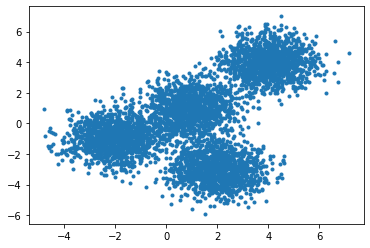

In [25]:
plt.scatter(X[:,0],X[:,1],marker = '.');

<h2 id="setting_up_K_means">Setting up K-Means</h2>
Now that we have our random data, let's set up our K-Means Clustering.


The KMeans class has many parameters that can be used, but we will be using these three:

<ul>
    <li> <b>init</b>: Initialization method of the centroids. </li>
    <ul>
        <li> Value will be: "k-means++" </li>
        <li> k-means++: Selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.</li>
    </ul>
    <li> <b>n_clusters</b>: The number of clusters to form as well as the number of centroids to generate. </li>
    <ul> <li> Value will be: 4 (since we have 4 centers)</li> </ul>
    <li> <b>n_init</b>: Number of time the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs in terms of inertia. </li>
    <ul> <li> Value will be: 12 </li> </ul>
</ul>

Initialize KMeans with these parameters, where the output parameter is called <b>k_means</b>.


In [28]:
k_means = KMeans(init = "k-means++",n_clusters = 4, n_init = 12)

In [29]:
# Training
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [31]:
#Print k-means label vector
k_means_label = k_means.labels_
k_means_label

array([3, 0, 1, ..., 1, 1, 1])

We will also get the coordinates of the cluster centers using KMeans' <b> .cluster_centers\_ </b> and save it as <b> k_means_cluster_centers </b>.


In [68]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[ 0.97039299,  1.00752392],
       [ 2.02057972, -3.02381805],
       [ 3.99829441,  3.96934387],
       [-2.02069003, -0.96400924]])

<h2 id="creating_visual_plot">Creating the Visual Plot</h2>

So now that we have the random data generated and the KMeans model initialized, let's plot them and see what it looks like!


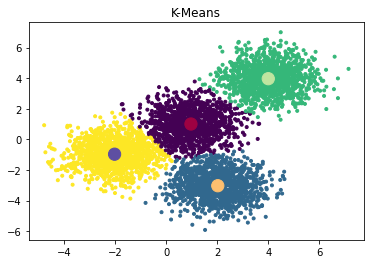

In [99]:
#Method 1:
plt.scatter(X[:,0],X[:,1],c = k_means_label ,marker = '.')
color_cluster = plt.cm.Spectral(np.linspace(0,1,len(set(k_means_label))))
plt.scatter(k_means_cluster_centers[:,0],k_means_cluster_centers[:,1], c = color_cluster,marker = "o", s =150)
plt.title('K-Means');

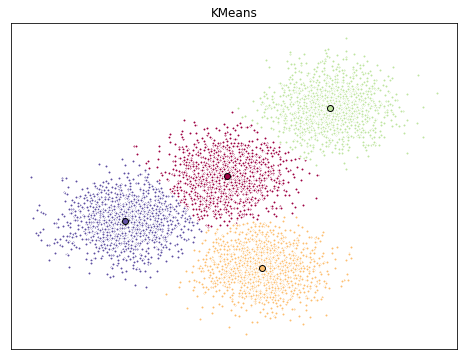

In [92]:
# Method 2:

fig = plt.figure(figsize = (8,6))
#Create colormap (4 colors for 4 cluster)
colors = plt.cm.Spectral(np.linspace(0,1,len(set(k_means_label))))
#Create plot
ax = fig.add_subplot(1,1,1)
# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, color in zip(range(len(k_means_cluster_centers)),colors):
    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_label == k)
    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]
    # X[my_members] is all the datapoints belong to cluster k
    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=color, marker='.')
    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=color,  markeredgecolor='k', markersize=6)
# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


In [70]:
my_members = (k_means_label == 0)
X[my_members]

array([[-0.3887384 , -0.06679709],
       [ 0.59939417,  1.36014817],
       [ 0.94382339,  1.67729097],
       ...,
       [ 0.46874404,  2.67896651],
       [ 1.16087755,  1.04138138],
       [-0.04632821,  0.46823689]])

In [42]:
my_members = (k_means_label == 0)

(5000,)

## Practice

Try to cluster the above dataset into 3 clusters.\
Notice: do not generate the data again, use the same dataset as above.

In [121]:
k_means_3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 15)
k_means_3.fit(X)

KMeans(n_clusters=3, n_init=15)

In [124]:
k_means_3_label = k_means_3.labels_
set(k_means_3_label) # 3 clus

{0, 1, 2}

In [129]:
k_means_3_clus = k_means_3.cluster_centers_
k_means_3_clus

array([[ 2.03719858, -2.9679089 ],
       [ 3.6938479 ,  3.65611641],
       [-0.7906539 , -0.14860883]])

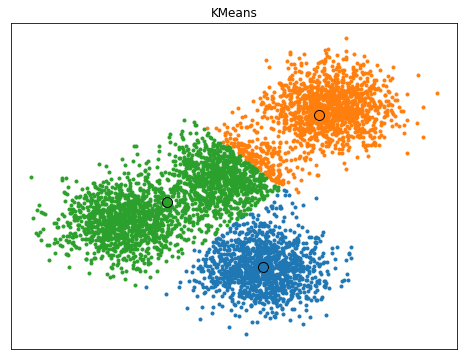

In [140]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(1,1,1)
colors = plt.cm.RdBu(np.linspace(0,1,len(set(k_means_3_label))))
for k, color in zip(range(len(k_means_3_clus)),colors):
    data_in_clus = (k_means_3_label == k)
    cluster = k_means_3_clus[k]
    ax.scatter(X[data_in_clus,0],X[data_in_clus,1],marker = '.')
    ax.plot(cluster[0],cluster[1],'o',markeredgecolor='k', markersize=10)
# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()

<h1 id="customer_segmentation_K_means">Customer Segmentation with K-Means</h1>

Imagine that you have a customer dataset, and you need to apply customer segmentation on this historical data.
Customer segmentation is the practice of partitioning a customer base into groups of individuals that have similar characteristics. It is a significant strategy as a business can target these specific groups of customers and effectively allocate marketing resources. For example, one group might contain customers who are high-profit and low-risk, that is, more likely to purchase products, or subscribe for a service. A business task is to retain those customers. Another group might include customers from non-profit organizations and so on.


## Load CSV dataset file

In [145]:
df_cust = pd.read_csv('E:\Python\ML_Learn\K_means\Cust_Segmentation.csv')
df_cust

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


<h2 id="pre_processing">Pre-processing</h2


As you can see, **Address** in this dataset is a categorical variable. The k-means algorithm isn't directly applicable to categorical variables because the Euclidean distance function isn't really meaningful for discrete variables. So, let's drop this feature and run clustering.


In [146]:
df_cust = df_cust.drop('Address',axis = 1)
df_cust

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2
...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8
846,847,28,2,7,34,0.359,2.021,0.0,7.0
847,848,25,4,0,18,2.802,3.210,1.0,33.4
848,849,32,1,12,28,0.116,0.696,0.0,2.9


In [158]:
# Data normalization
from sklearn.preprocessing import StandardScaler
x = df_cust.values[:,1:]
x

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

In [165]:
x.shape

(850, 8)

In [159]:
# Nan at row 5
x[5,1:]

array([ 1.   , 23.   , 81.   ,  0.998,  7.831,    nan, 10.9  ])

In [160]:
# Replace nan with np.nan_to_num
x = np.nan_to_num(x)
x

array([[41.   ,  2.   ,  6.   , ...,  1.073,  0.   ,  6.3  ],
       [47.   ,  1.   , 26.   , ...,  8.218,  0.   , 12.8  ],
       [33.   ,  2.   , 10.   , ...,  5.802,  1.   , 20.9  ],
       ...,
       [25.   ,  4.   ,  0.   , ...,  3.21 ,  1.   , 33.4  ],
       [32.   ,  1.   , 12.   , ...,  0.696,  0.   ,  2.9  ],
       [52.   ,  1.   , 16.   , ...,  3.638,  0.   ,  8.6  ]])

https://numpy.org/doc/stable/reference/generated/numpy.nan_to_num.html

In [161]:
x[5,1:]

array([ 1.   , 23.   , 81.   ,  0.998,  7.831,  0.   , 10.9  ])

In [163]:
dataset = StandardScaler().fit_transform(x)
dataset

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

In [164]:
dataset.shape

(850, 8)

<h2 id="modeling">Modeling</h2>


In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Let's apply k-means on our dataset, and take a look at cluster labels.


In [168]:
cluster_num = 3 #Define numbers of customer group (number of clusters in k-means)
k_means = KMeans(init = 'k-means++',n_clusters = cluster_num, n_init = 12)
k_means.fit(dataset)

KMeans(n_clusters=3, n_init=12)

<h2 id="insights">Insights</h2>

We assign the labels to each row in the dataframe.


In [180]:
df_cust['Clus_km'] = k_means.labels_
df_cust

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,6.8,1
846,847,28,2,7,34,0.359,2.021,0.0,7.0,1
847,848,25,4,0,18,2.802,3.210,1.0,33.4,0
848,849,32,1,12,28,0.116,0.696,0.0,2.9,1


In [173]:
# Use groupby to check cluster_center values (means of all datapoints in this each of 3 clusters)
df_cust.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,424.451807,31.891566,1.861446,3.963855,31.789157,1.576675,2.843355,0.993939,13.994578
1,426.122905,33.817505,1.603352,7.625698,36.143389,0.853128,1.816855,0.000000,7.964991
2,424.408163,43.000000,1.931973,17.197279,101.959184,4.220673,7.954483,0.162393,13.915646


## 2d - Visualization (2 features)

Now, let's look at the distribution of customers based on their age and income (Choose two features: Age and Income to visualize)


In [231]:
df_visual2 = df_cust[['Age','Income']]
df_visual2

,Age,Income
0,41,19
1,47,100
2,33,57
3,29,19
4,47,253
...,...,...
845,27,26
846,28,34
847,25,18
848,32,28


In [232]:
visual_values3 = df_visual.values
visual_values3

array([[ 41,  19],
       [ 47, 100],
       [ 33,  57],
       ...,
       [ 25,  18],
       [ 32,  28],
       [ 52,  64]], dtype=int64)

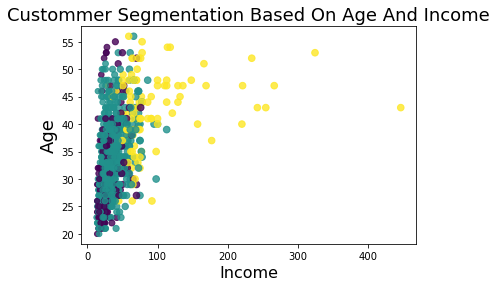

In [262]:
labels = k_means.labels_
area = np.pi*(visual_values[:,1])**10
plt.scatter(visual_values[:,1],visual_values[:,0],s = np.log(area),c=labels,alpha=0.8)
plt.ylabel('Age', fontsize=18)
plt.xlabel('Income', fontsize=16);
plt.title('Custommer Segmentation Based On Age And Income',fontsize = 18);

(0.0, 150.0)

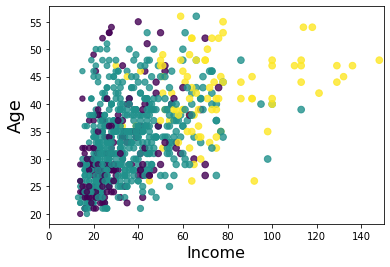

In [265]:
#Clearly cluster
plt.scatter(visual_values[:,1],visual_values[:,0],s = np.log(area),c=labels,alpha=0.8)
plt.ylabel('Age', fontsize=18)
plt.xlabel('Income', fontsize=16);
plt.xlim(0,150)

We can see 3 customer group:
*  ** High income, high age **
*  ** Middle income, middle age **
*  ** Low income, low age **

## 3d - Visualization (3 features)

Now, let's choose 3 feature to visualize: Age, Income, Education

In [236]:
visual3 = df_cust [['Age','Edu','Income']].values
visual3

array([[ 41,   2,  19],
       [ 47,   1, 100],
       [ 33,   2,  57],
       ...,
       [ 25,   4,  18],
       [ 32,   1,  28],
       [ 52,   1,  64]], dtype=int64)

Text(0.5, 0.92, 'Custommer Segmentation Based On Age-Education-Income')

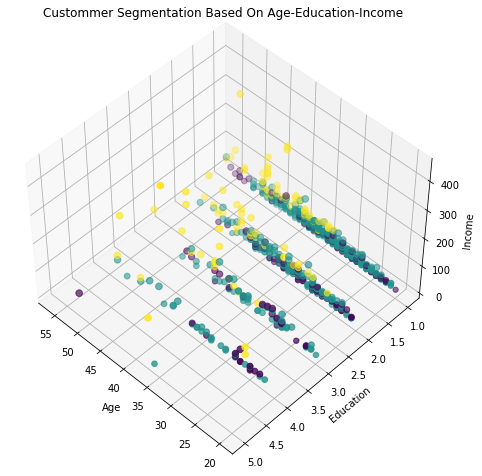

In [272]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1,figsize = (8,6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()
ax.set_xlabel('Age')
ax.set_ylabel('Education')
ax.set_zlabel('Income')
ax.scatter(visual3[:, 0], visual3[:, 1], visual3[:, 2], c= labels,marker = 'o',s = np.log(area));
ax.set_title("Custommer Segmentation Based On Age-Education-Income")

https://matplotlib.org/stable/api/_as_gen/mpl_toolkits.mplot3d.axes3d.Axes3D.html

k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster.
For example, the 3 clusters can be:

*   AFFLUENT, EDUCATED AND OLD AGED
*   MIDDLE AGED AND MIDDLE INCOME
*   YOUNG AND LOW INCOME
